#### GETTIN
## Planejamento de Equipamentos Escolares
## Método: Uncapacitaded Facility Location
### Versão: 0.5
#### Fillipe O Feitosa <fillipefeitosa@ua.pt>

---


#### Modeling and Creating Decision Variables

In [25]:
# Import Libraries
from gurobi import *
import math
import matplotlib.pyplot as plt

def distance(a,b):
    dx = a[0] - b[0]
    dy = a[1] - b[1]
    return math.sqrt(dx*dx + dy*dy)

# Data
# Problem data
subSections = [[0, 1.5],[1.5, 0.5],[0.75, 1.5],[1.2, 0.5],[1.7, 0.1],[0.87, 1.5],[1.42, 1.5]]
schools = [[0,0],[0,1],[0,2],
              [1,0],[1,1],[1,2],
              [2,0],[2,1],[2,2]]
# @charge: custo de construcao por escola (fixo em 1)
charge = [1,1,1,1,1,1,1,1,1]

numSchools = len(schools)
numSubSections = len (subSections)

# Creting Guroby Model
m = Model()

# Decision Variables
x = {}
y = {}
d = {} # Distance Matrix
# @alpha: custo fixo de deslocamento por km
alpha = 1

# creating binary variable for every school
for j in range(numSchools):
    x[j] = m.addVar(vtype=GRB.BINARY, name="escola(%d)" % j)

# creating continuous variable for subsections to check suply fractions
for i in range(numSubSections):
    for j in range(numSchools):
        # Fractions of Subsection Suply
        y[(i,j)] = m.addVar(lb=0, vtype=GRB.CONTINUOUS, name="Fração da Sub[%d], escola[%d]" % (i,j))
        # Distances between Subsections and Schools
        d[(i,j)] = distance(subSections[i], schools[j])

m.update()

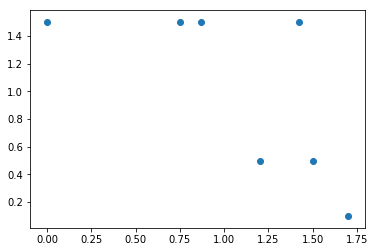

In [26]:
# A smal test for the cost.
len(charge) == len(schools)
# for j in charge:
#    print(j*x[j])
# Show Schools Map
plt.scatter(*zip(*subSections))
plt.show()

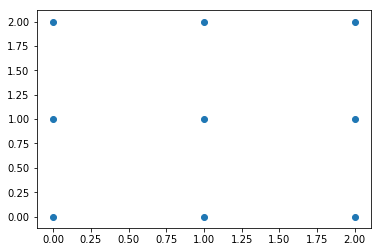

In [27]:
plt.scatter(*zip(*schools))
plt.show()

#### Adding Constraints

In [28]:
# Constraint for Every Student on School
for i in range(numSubSections):
    m.addConstr(quicksum(y[(i,j)] for j in range(numSchools)) == 1)

# Fraction of suply must be lower or equal than the BINARY x[j] available 
for i in range(numSubSections):
    for j in range(numSchools):
        m.addConstr(y[(i,j)] <= x[j])

#### Objetive


In [29]:
# Setting objective

m.setObjective( quicksum(charge[j]*x[j] + quicksum(alpha*d[(i,j)]*y[(i,j)]
                for i in range(numSubSections)) for j in range(numSchools)), GRB.MINIMIZE )


m.optimize()

Optimize a model with 70 rows, 72 columns and 189 nonzeros
Variable types: 63 continuous, 9 integer (9 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 70 rows, 72 columns, 189 nonzeros
Variable types: 63 continuous, 9 integer (9 binary)

Root relaxation: objective 6.232466e+00, 14 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       6.2324664    6.23247  0.00%     -    0s

Explored 0 nodes (14 simplex iterations) in 0.02 seconds
Thread count was 8 (of 8 available processors)

Solution count 1: 6.23247 

Optimal solution found (tolerance 1.00e-04)
Best objective 6.232466432940e+00, best bound 6.232466432940e+00, gap 0.0000%


In [30]:
m

<gurobi.Model MIP instance Unnamed: 70 constrs, 72 vars, Parameter changes: LogFile=gurobi.log, CSIdleTimeout=1800>

In [31]:
print('Obj: %g' % m.objVal)

Obj: 6.23247


In [32]:
for v in m.getVars():
       print('%s   %g' % (v.varName, v.x))

escola(0)   -0
escola(1)   -0
escola(2)   -0
escola(3)   -0
escola(4)   1
escola(5)   -0
escola(6)   -0
escola(7)   -0
escola(8)   -0
Fração da Sub[0], escola[0]   0
Fração da Sub[0], escola[1]   0
Fração da Sub[0], escola[2]   0
Fração da Sub[0], escola[3]   0
Fração da Sub[0], escola[4]   1
Fração da Sub[0], escola[5]   0
Fração da Sub[0], escola[6]   0
Fração da Sub[0], escola[7]   0
Fração da Sub[0], escola[8]   0
Fração da Sub[1], escola[0]   0
Fração da Sub[1], escola[1]   0
Fração da Sub[1], escola[2]   0
Fração da Sub[1], escola[3]   0
Fração da Sub[1], escola[4]   1
Fração da Sub[1], escola[5]   0
Fração da Sub[1], escola[6]   0
Fração da Sub[1], escola[7]   0
Fração da Sub[1], escola[8]   0
Fração da Sub[2], escola[0]   0
Fração da Sub[2], escola[1]   0
Fração da Sub[2], escola[2]   0
Fração da Sub[2], escola[3]   0
Fração da Sub[2], escola[4]   1
Fração da Sub[2], escola[5]   0
Fração da Sub[2], escola[6]   0
Fração da Sub[2], escola[7]   0
Fração da Sub[2], escola[8]   0
Fr